In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

In [14]:
dataset=pd.read_csv('Life Expectancy Data.csv')

In [15]:
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [17]:
data=dataset[['Alcohol','Measles ','Polio','GDP']]
data

,Alcohol,Measles,Polio,GDP
0,0.01,1154,6.0,584.259210
1,0.01,492,58.0,612.696514
2,0.01,430,62.0,631.744976
3,0.01,2787,67.0,669.959000
4,0.01,3013,68.0,63.537231
...,...,...,...,...
2933,4.36,31,67.0,454.366654
2934,4.06,998,7.0,453.351155
2935,4.43,304,73.0,57.348340
2936,1.72,529,76.0,548.587312


In [18]:
def arr_df(a):
    df = pd.DataFrame(a, columns=data.columns)
    return df
scaler1 = StandardScaler()
scaled_1 = arr_df(scaler1.fit_transform(data))
scaled_1

,Alcohol,Measles,Polio,GDP
0,-1.133571,-0.110384,-3.268019,-0.483546
1,-1.133571,-0.168124,-1.048077,-0.481553
2,-1.133571,-0.173531,-0.877312,-0.480218
3,-1.133571,0.032045,-0.663856,-0.477539
4,-1.133571,0.051757,-0.621165,-0.520044
...,...,...,...,...
2933,-0.059941,-0.208332,-0.663856,-0.492650
2934,-0.133984,-0.123991,-3.225328,-0.492722
2935,-0.042664,-0.184521,-0.407709,-0.520477
2936,-0.711523,-0.164897,-0.279635,-0.486046


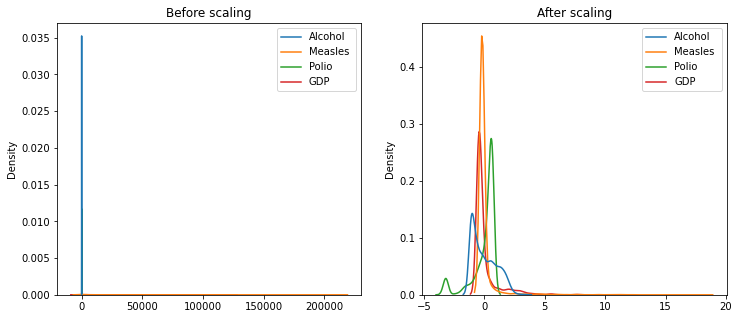

In [19]:
def data_visualize(columns, df1, df2, label1, label2):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
  ax1.set_title(label1)
  sns.kdeplot(data=df1[columns], ax=ax1)
  ax2.set_title(label2)
  sns.kdeplot(data=df2[columns], ax=ax2)
  plt.show()

data_visualize(data.columns, data, scaled_1, 'Before scaling', 'After scaling')

In [20]:
scaler2 = MinMaxScaler()
scaled_2 = arr_df(scaler2.fit_transform(data))
scaled_2

,Alcohol,Measles,Polio,GDP
0,0.000000,0.005439,0.031250,0.004889
1,0.000000,0.002319,0.572917,0.005127
2,0.000000,0.002027,0.614583,0.005287
3,0.000000,0.013135,0.666667,0.005608
4,0.000000,0.014200,0.677083,0.000519
...,...,...,...,...
2933,0.243561,0.000146,0.666667,0.003799
2934,0.226764,0.004703,0.041667,0.003790
2935,0.247480,0.001433,0.729167,0.000467
2936,0.095745,0.002493,0.760417,0.004589


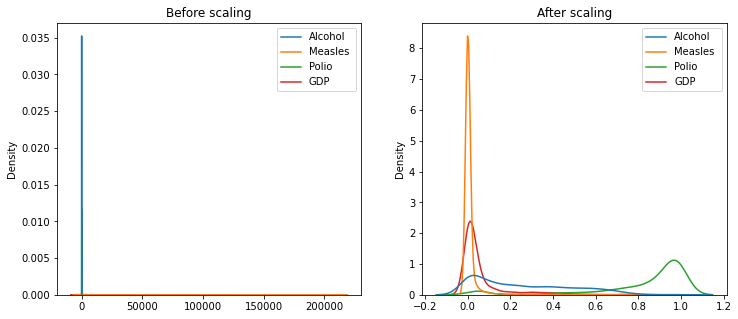

In [21]:
data_visualize(data.columns, data, scaled_2, 'Before scaling', 'After scaling')

In [22]:
scaler3 = RobustScaler()
scaled_3 = arr_df(scaler3.fit_transform(data))
scaled_3

,Alcohol,Measles,Polio,GDP
0,-0.548718,3.156142,-4.578947,-0.217132
1,-0.548718,1.318529,-1.842105,-0.211911
2,-0.548718,1.146426,-1.631579,-0.208414
3,-0.548718,7.689105,-1.368421,-0.201398
4,-0.548718,8.316447,-1.315789,-0.312732
...,...,...,...,...
2933,0.088645,0.038862,-1.368421,-0.240979
2934,0.044689,2.723109,-4.526316,-0.241165
2935,0.098901,0.796669,-1.052632,-0.313868
2936,-0.298168,1.421235,-0.894737,-0.223681


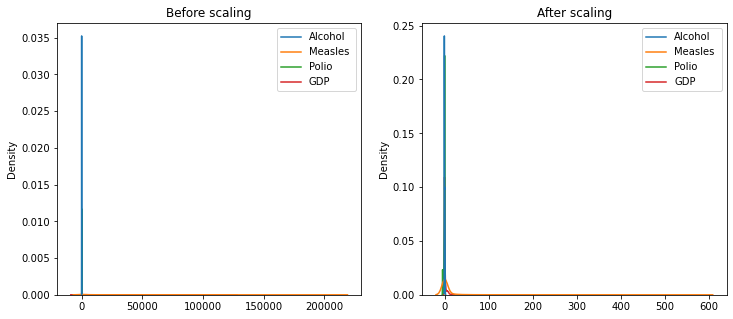

In [23]:
data_visualize(data.columns, data, scaled_3, 'Before scaling', 'After scaling')

In [24]:
def plot_for_analys(df, variable, title):
    fig, ax = plt.subplots(figsize=(15,7))
    plt.subplot(1, 2, 1)
    sns.violinplot(x=df[variable])    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

In [25]:
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary

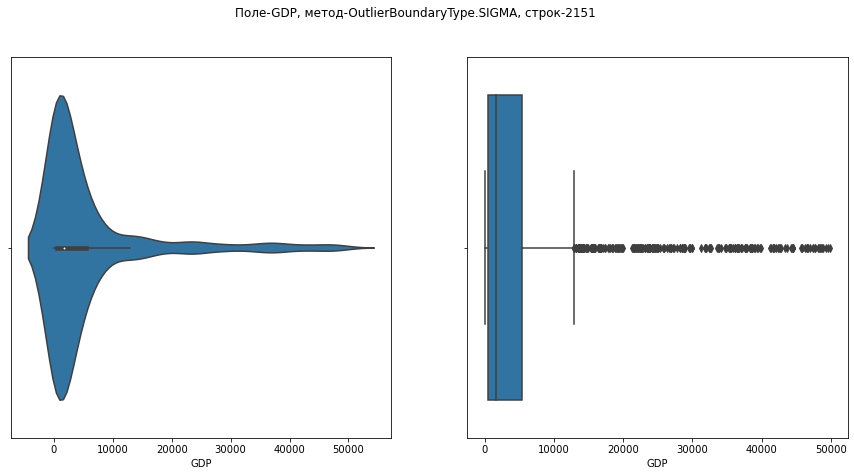

In [26]:
x_col_list = ['GDP']
data=X_train
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        plot_for_analys(data_trimmed, col, title)

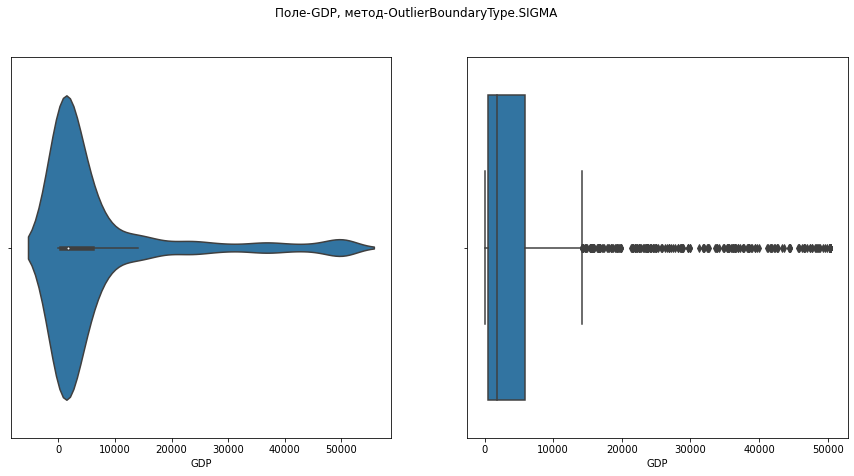

In [27]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        plot_for_analys(data, col, title)

In [30]:
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

data1=dataset['Country']
vec = CountVectorizer()
X = vec.fit_transform(data1)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df["text"] = data1
df

,afghanistan,africa,african,albania,algeria,america,and,angola,antigua,arab,...,venezuela,verde,viet,vincent,yemen,yugoslav,zambia,zealand,zimbabwe,text
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Afghanistan
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Afghanistan
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Afghanistan
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Afghanistan
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Zimbabwe
2934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Zimbabwe
2935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Zimbabwe
2936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Zimbabwe


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(data1)

df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df["text"] = data1
df

,afghanistan,africa,african,albania,algeria,america,and,angola,antigua,arab,...,venezuela,verde,viet,vincent,yemen,yugoslav,zambia,zealand,zimbabwe,text
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Zimbabwe
2934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Zimbabwe
2935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Zimbabwe
2936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Zimbabwe


<AxesSubplot:>

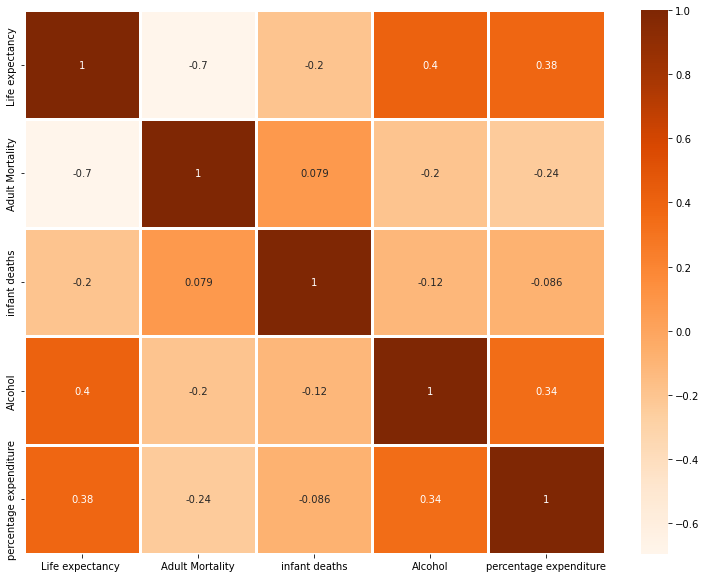

In [51]:
data2=dataset.iloc[:,3:8]

plt.figure(figsize=(13,10))
sns.heatmap(data2.corr(), cmap="Oranges", annot=True, linewidths=3)

In [52]:
def make_corr_df(df):
    cr = data2.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.53]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [53]:
make_corr_df(data2)

,f1,f2,corr
0,Life expectancy,Adult Mortality,0.696359
1,Adult Mortality,Life expectancy,0.696359


In [54]:
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [55]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data2))

[['Adult Mortality', 'Life expectancy ']]

In [56]:
data2=data2.drop(['Adult Mortality'],axis=1)
data2.head()

,Life expectancy,infant deaths,Alcohol,percentage expenditure
0,65.0,62,0.01,71.279624
1,59.9,64,0.01,73.523582
2,59.9,66,0.01,73.219243
3,59.5,69,0.01,78.184215
4,59.2,71,0.01,7.097109


In [81]:
from sklearn.impute import SimpleImputer
imp_freq=SimpleImputer(strategy='most_frequent')
dataset['Adult Mortality']=imp_freq.fit_transform(dataset[['Adult Mortality']])
dataset['Alcohol']=imp_freq.fit_transform(dataset[['Alcohol']])
dataset['Polio']=imp_freq.fit_transform(dataset[['Polio']])
dataset['GDP']=imp_freq.fit_transform(dataset[['GDP']])
dataset['Population']=imp_freq.fit_transform(dataset[['Population']])

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS


X=dataset[['Alcohol','Polio','GDP','Population']]
y=dataset[['Adult Mortality']]
X_train,X_test,y_train,y_test=train_test_split(X,y)
knn = KNeighborsClassifier(n_neighbors=3)
efs1 = EFS(knn, 
           min_features=1,
           max_features=3,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X_train, y_train, custom_feature_names=X.columns)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 14/14

Best accuracy score: 0.02
Best subset (indices): (0, 2, 3)
Best subset (corresponding names): ('Alcohol', 'GDP', 'Population')


In [86]:
from sklearn.linear_model import Lasso
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(X_train, y_train)
# Коэффициенты регрессии
list(zip(X_train.columns, e_ls1.coef_))

[('Alcohol', -2.4810128603610444),
 ('Polio', -1.1461474687966557),
 ('GDP', -0.0019963188916686447),
 ('Population', -2.4480409189060463e-08)]

In [87]:
from sklearn.feature_selection import SelectFromModel
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(X_train, y_train)
list(zip(X_train.columns, sel_e_ls1.get_support()))

[('Alcohol', True), ('Polio', True), ('GDP', True), ('Population', False)]